### Imports and environemnt setup

In [1]:
import utils 
import pandas as pd

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

import numpy as np
import hopsworks

In [2]:
from_csv = False
csv_path = 'movies_2023-04-30_2023-01-01_20_0END.csv'
scaling_factor = 1000000

### Get data from API or load csv

In [3]:
nb_pages = 20
first_page = 0

lte_release_date = '2000-12-31'
gte_release_date = '2000-01-01'

In [4]:
if from_csv:
    movies_df = pd.read_csv(csv_path)
else:
    movies_dict = utils.get_movies_list(lte_release_date, gte_release_date, nb_pages, first_page)
    all_movie_details = []
    for i in range(len(movies_dict)):
        print(f'Extracting features of film {i} ------')
        movie_id = movies_dict[i]['id'] 
        movie_details = utils.extract_features(movie_id)
        if movie_details == -1:
            # We reached the last movie with revenues
            break
        elif not (movie_details is None):
            all_movie_details.append(movie_details)
    movies_df = pd.DataFrame(all_movie_details)

Extracting features of film 0 ------
Extracting features of film 1 ------
Extracting features of film 2 ------
Extracting features of film 3 ------
Extracting features of film 4 ------
Extracting features of film 5 ------
Extracting features of film 6 ------
Extracting features of film 7 ------
Extracting features of film 8 ------
Extracting features of film 9 ------
Extracting features of film 10 ------
Extracting features of film 11 ------
Extracting features of film 12 ------
Extracting features of film 13 ------
Extracting features of film 14 ------
Extracting features of film 15 ------
Extracting features of film 16 ------
Extracting features of film 17 ------
Extracting features of film 18 ------
Extracting features of film 19 ------
Extracting features of film 20 ------
Extracting features of film 21 ------
Extracting features of film 22 ------
Extracting features of film 23 ------
Extracting features of film 24 ------
Extracting features of film 25 ------
Extracting features of

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/julien/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-4d438243448a>", line 9, in <module>
    movie_details = utils.extract_features(movie_id)
  File "/home/julien/KTH/SML_DL/project/SMLproject/utils.py", line 122, in extract_features
    return -1
  File "/home/julien/KTH/SML_DL/project/SMLproject/utils.py", line 56, in get_keywords_related_films_average_score
    response = requests.get(url, headers=headers)
  File "/home/julien/KTH/SML_DL/project/SMLproject/utils.py", line 15, in get_movie_details
  File "/home/julien/anaconda3/lib/python3.8/site-packages/requests/api.py", line 76, in get
    return request('get', url, params=params, **kwargs)
  File "/home/julien/anaconda3/lib/python3.8/site-packages/requests/api.py", line 61, in request
    return session.request(method=method, url=url, **kwargs)
  File "/h

In [5]:
features = ['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime', 
              'title', 'vote_average', 'vote_count', 'similar_revenues', 
              'crew_popularity', 'top_cast_popularity']

In [8]:
movies_df = movies_df[features]
primary_key = movies_df.columns
primary_key

Empty DataFrame
Columns: []
Index: []


Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


KeyError: "None of [Index(['budget', 'id', 'popularity', 'release_date', 'revenue', 'runtime',\n       'title', 'vote_average', 'vote_count', 'similar_revenues',\n       'crew_popularity', 'top_cast_popularity'],\n      dtype='object')] are in the [columns]"

In [ ]:
movies_df

,budget,id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,similar_revenues,crew_popularity,top_cast_popularity
0,94000000,122,107.054,2003-12-01,1118888979,201,The Lord of the Rings: The Return of the King,8.476,22802,1.067593e+08,88.261,367.627
1,94000000,12,81.932,2003-05-30,940335536,100,Finding Nemo,7.823,18331,3.301315e+08,68.898,339.588
2,150000000,604,48.849,2003-05-15,738599701,138,The Matrix Reloaded,7.041,10321,1.477408e+08,46.096,369.518
3,140000000,22,114.029,2003-07-09,655011224,143,Pirates of the Caribbean: The Curse of the Bla...,7.794,19540,1.550161e+08,42.369,331.367
4,80000000,310,84.878,2003-05-23,484600000,101,Bruce Almighty,6.710,10167,6.151630e+07,98.050,450.645
...,...,...,...,...,...,...,...,...,...,...,...,...
236,42,48891,2.688,2003-03-20,19,89,Ann Rule Presents: The Stranger Beside Me,6.500,21,3.752815e+07,7.333,119.447
237,1,273566,1.377,2003-01-01,15,90,Latham Entertainment Presents: An All New Come...,0.000,0,0.000000e+00,2.400,24.182
238,10000000,63903,3.863,2003-01-24,10,96,Stealing Sinatra,5.300,15,0.000000e+00,9.171,163.995
239,12,866560,0.600,2003-11-24,5,0,"ig,gz,",0.000,0,1.502222e+07,0.600,1.200


In [10]:
if not from_csv:
    movies_df.to_csv(f'movies_{lte_release_date}_{gte_release_date}_{nb_pages}_{first_page}.csv', index=False)

### Login to Hopsworks

In [2]:
project = hopsworks.login(api_key_value='RxQGWC6jgV4qeaCR.TXxUccLCHn2Y1E3wr5g6sW3b2wcTYIOezIF1a6bvd2cTnC6cJDtlwxX52OGxeaWE')
fs = project.get_feature_store()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/359572
Connected. Call `.close()` to terminate connection gracefully.


In [12]:
movies_fg = fs.get_or_create_feature_group(
    name="movies",
    version=1,
    primary_key= primary_key, 
    description="Movies form TMDB")
movies_fg.insert(movies_df)

Uploading Dataframe: 0.00% |          | Rows 0/241 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: movies_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/359572/jobs/named/movies_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7feb94918580>, None)

### Training a basic model

In [31]:
features = ['budget', 'runtime', 'similar_revenues',
            'crew_popularity', 'top_cast_popularity']
label = ['revenue']

In [32]:
movies_df = movies_df.dropna()

X = movies_df[features]
X[['budget', 'similar_revenues']] = X[['budget', 'similar_revenues']]/scaling_factor

y = movies_df[label]/scaling_factor

/home/julien/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
X['similar_revenues'].max()

586.1506232857142

In [34]:
X

,budget,runtime,similar_revenues,crew_popularity,top_cast_popularity
1,237.00,162,15.455790,39.879,296.728
2,356.00,181,255.790045,131.491,610.642
3,460.00,192,387.719175,48.387,377.392
5,245.00,136,120.270538,31.704,433.580
6,300.00,149,248.224488,134.348,620.710
...,...,...,...,...,...
1981,59.00,86,280.794838,21.892,355.107
1983,28.00,98,59.689530,15.160,171.734
1984,13.00,168,141.398676,9.410,66.100
1995,0.85,78,25.015113,9.744,23.065


In [35]:
model = KNeighborsRegressor(n_neighbors= 10)
# model = RadiusNeighborsRegressor(radius= 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
reg = model.fit(X_train, y_train)

# Evaluate on training set
y_pred = reg.predict(X_train)
mse = mean_squared_error(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print("Training set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))

# Evaluate on test set
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set scores: mse %f, mae %f, r2 %f" % (mse, mae, r2))


Training set scores: mse 48608.830014, mae 135.340764, r2 0.551709
Test set scores: mse 60183.085776, mae 164.079071, r2 0.424479


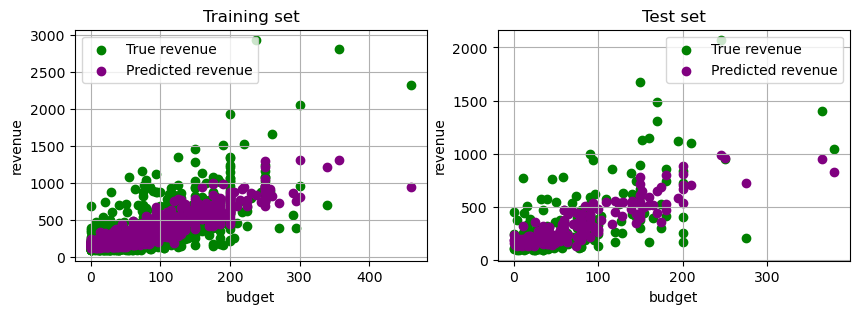

In [36]:
f, ax = plt.subplots(1, 2,figsize=(10, 3))
ax[0].scatter(X_train[['budget']], y_train, color='green')
ax[0].scatter(X_train[['budget']], reg.predict(X_train), color='purple')
ax[0].set_title('Training set')
ax[0].set_xlabel('budget')
ax[0].set_ylabel('revenue')
ax[0].legend(['True revenue', 'Predicted revenue'])
ax[0].grid()
ax[1].scatter(X_test[['budget']], y_test, color='green')
ax[1].scatter(X_test[['budget']], reg.predict(X_test), color='purple')
ax[1].set_title('Test set')
ax[1].set_xlabel('budget')
ax[1].set_ylabel('revenue')
ax[1].legend(['True revenue', 'Predicted revenue'])
ax[1].grid()

plt.show()

# plt.scatter(X_train, y_train, color='green')
# plt.scatter(X_train, reg.predict(X_train), color='purple')

### Feature selection

In [11]:
features = ['budget', 'genre1', 'genre2', 'genre3', 
            'popularity', 'runtime', 
            'vote_average', 'vote_count', 'similar_revenues',
            'crew_popularity', 'top_cast_popularity']
label = ['revenue']

In [12]:
movies_df = movies_df.dropna()

features_df = movies_df[features]
features_df[['budget', 'similar_revenues']] = features_df[['budget', 'similar_revenues']]/scaling_factor
target = movies_df[label]/scaling_factor

/home/julien/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [21]:
target = np.ravel(np.array(target))

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import RandomForestRegressor

scores = list()
for n_features in range(2, 10):
    acs = []
    for sel in ['rfe', 'kbest']:
        if sel == 'rfe':
            selector = RFE(RandomForestRegressor(random_state = 0), n_features_to_select=n_features)
            selector.fit(features_df, target)
        elif sel == 'kbest': 
            selector = SelectKBest(f_classif, k=n_features)
            selector.fit(features_df, target)
        # Get columns to keep and create new dataframe with those only
        cols_idxs = selector.get_support(indices=True)
        features_df_new = features_df.iloc[:,cols_idxs]
        x = features_df_new
        print(f"Selector {sel}, features are {x.columns}")
        y = target
        X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
        model = RandomForestRegressor(random_state=0)
        model.fit(X_train, y_train)

        # Evaluate model performance using the features from the test set (X_test)
        y_pred = model.predict(X_test)
        metric = mean_squared_error(y_test, y_pred)
        print(f"MSE for selector {sel} and num_features {n_features} is {metric}")
        print('------')
        acs.append(metric)
    scores.append(acs)    


Selector rfe, features are Index(['budget', 'vote_count'], dtype='object')
MSE for selector rfe and num_features 2 is 36699.24473716045
------
Selector kbest, features are Index(['popularity', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 2 is 58116.787133151796
------
Selector rfe, features are Index(['budget', 'popularity', 'vote_count'], dtype='object')
MSE for selector rfe and num_features 3 is 35234.08498508582
------
Selector kbest, features are Index(['budget', 'popularity', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 3 is 35234.08498508582
------
Selector rfe, features are Index(['budget', 'popularity', 'vote_count', 'similar_revenues'], dtype='object')
MSE for selector rfe and num_features 4 is 29831.125410993493
------
Selector kbest, features are Index(['budget', 'popularity', 'vote_average', 'vote_count'], dtype='object')
MSE for selector kbest and num_features 4 is 34291.42101986655
------
Selector rfe, features are Index

For a RandomForestRegressor, the best set of features seems to be 